In [1]:
install.packages("forecast")
install.packages("zoo")
install.packages("ggplot2")
library(forecast)
library(zoo)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [8]:
install.packages("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
library(readxl)
df <- read_excel("/content/Gold_data.xlsx")
head(df)

Date,USD,EUR,GBP,INR,AED,CNY
<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1985-01-01,308.3,402.45,266.01,3825.85,1134.42,NA
1985-01-02,305.5,401.49,266,3787.05,1134.42,NA
1985-01-03,302.3,397.08,262.76,3718.88,1107.67,NA
1985-01-04,303.15,397.15,262.58,3759.64,1118.21,NA
1985-01-07,298.25,392.55,261.17,3741.23,1091.58,835.8
1985-01-08,302,395.32,263.07,3820.7,1114.06,853.01


In [13]:
df$Date <- as.Date(df$Date, format = "%Y-%m-%d")
df$USD <- as.numeric(df$USD)
str(df)

tibble [9,669 × 7] (S3: tbl_df/tbl/data.frame)
 $ Date: Date[1:9669], format: "1985-01-01" "1985-01-02" ...
 $ USD : num [1:9669] 308 306 302 303 298 ...
 $ EUR : chr [1:9669] "402.45" "401.49" "397.08" "397.15" ...
 $ GBP : chr [1:9669] "266.01" "266" "262.76" "262.58" ...
 $ INR : chr [1:9669] "3825.85" "3787.05" "3718.88" "3759.64" ...
 $ AED : chr [1:9669] "1134.42" "1134.42" "1107.67" "1118.21" ...
 $ CNY : chr [1:9669] NA NA NA NA ...


In [14]:
# Можно создать объект ts (для forecast) или zoo/xts
df_ts <- ts(df$USD, start=c(2020,1), frequency=365)

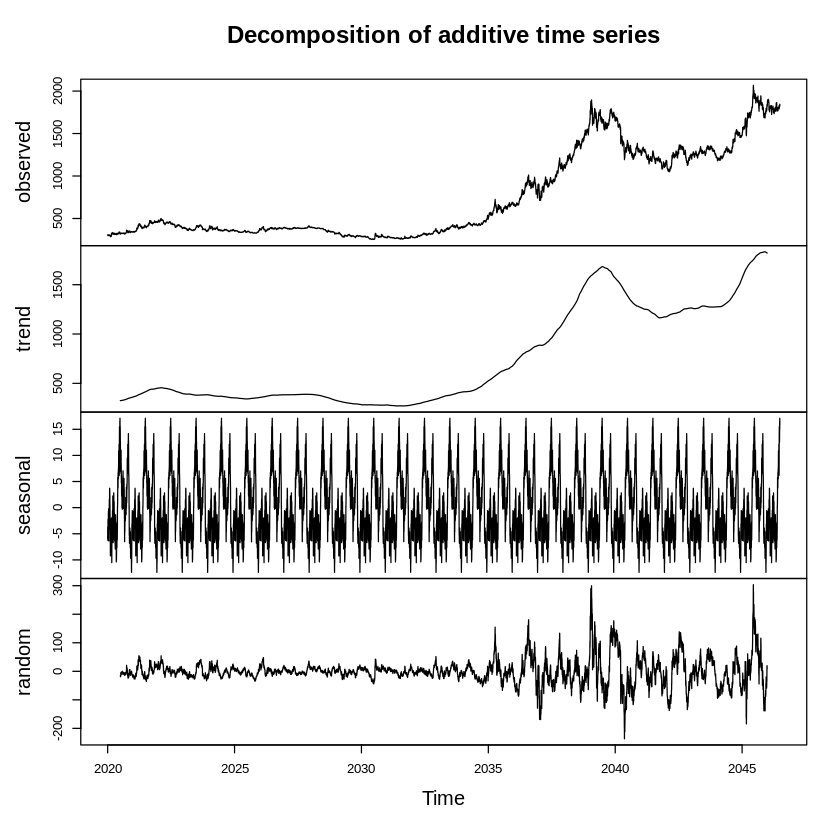

In [16]:
decomp <- decompose(df_ts, type="additive")
plot(decomp)

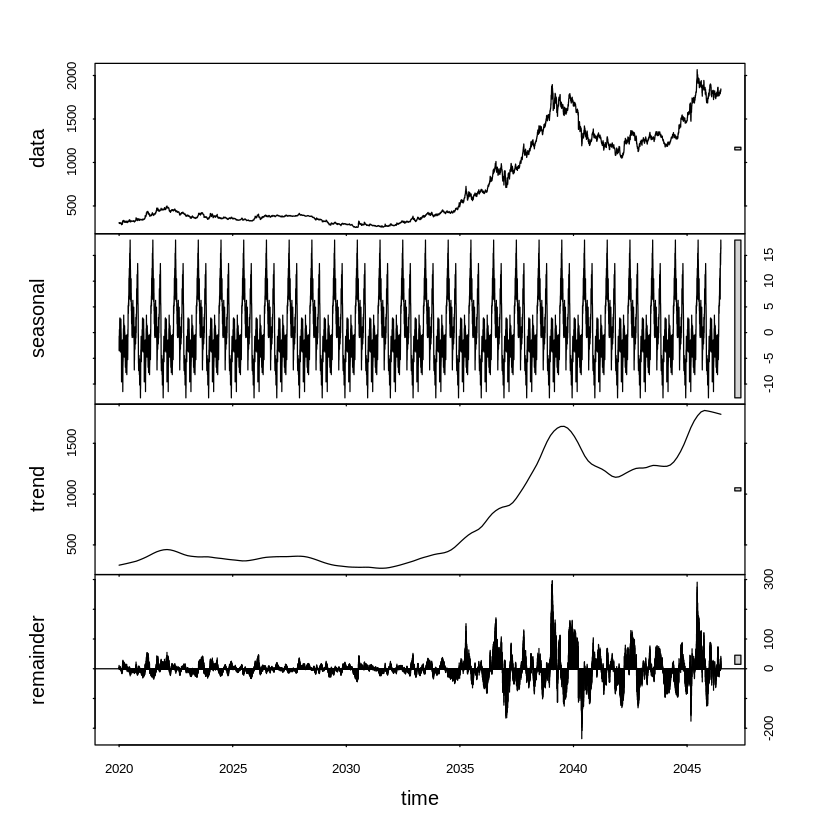

In [17]:
library(forecast)

# Автоматическая декомпозиция STL
fit <- stl(df_ts, s.window="periodic")
plot(fit)

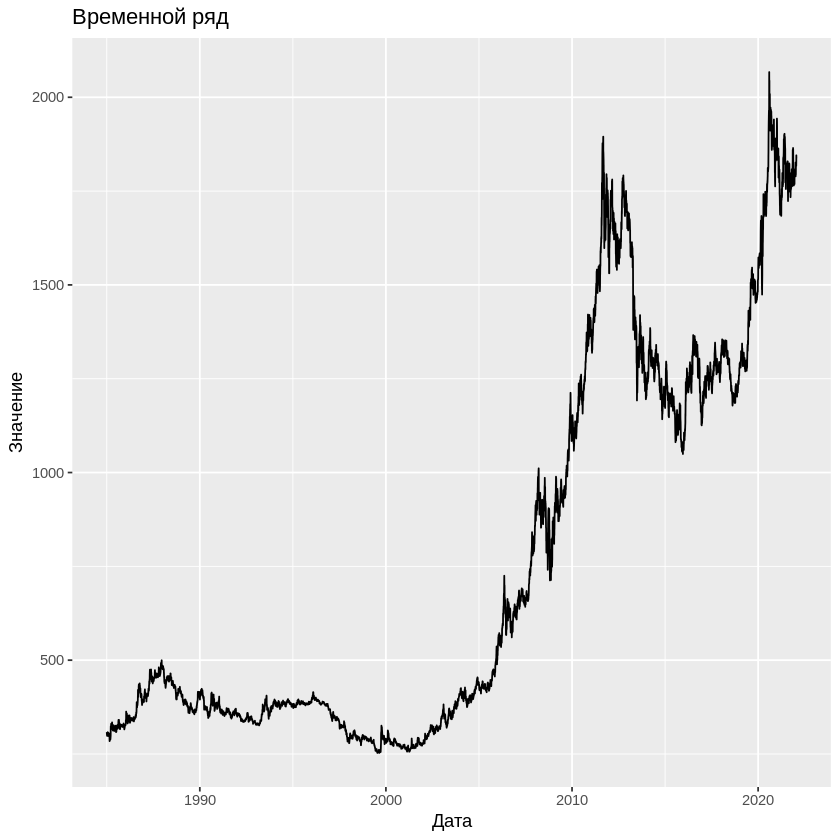

In [19]:
ggplot(df, aes(x=Date, y=USD)) +
geom_line() +
ggtitle("Временной ряд") +
xlab("Дата") + ylab("Значение")

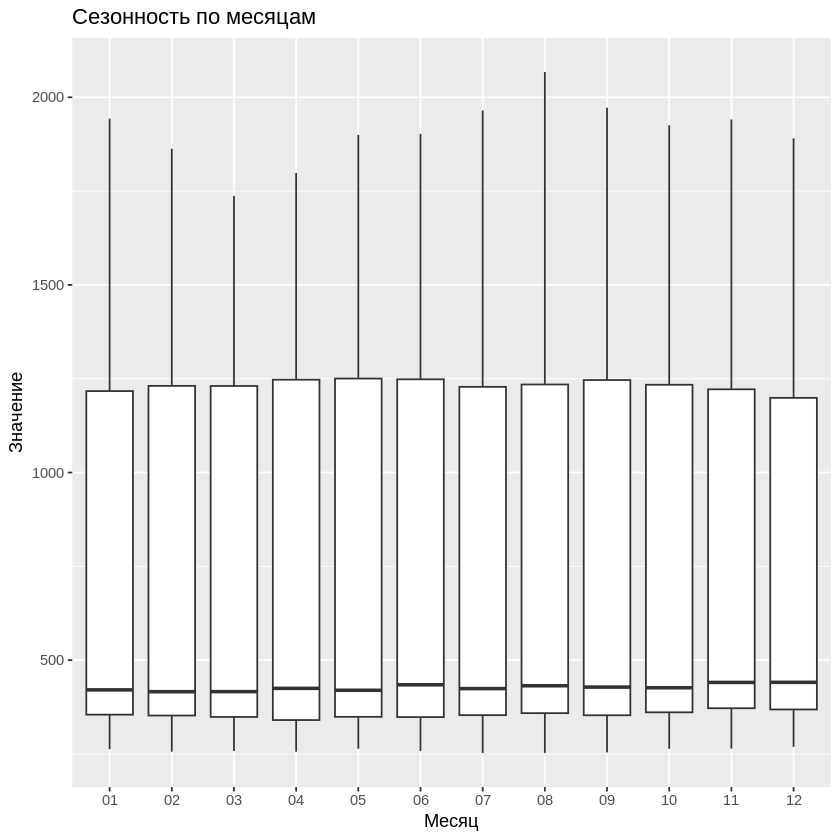

In [21]:
df$Month <- format(df$Date, "%m")
ggplot(df, aes(x=Month, y=USD)) +
geom_boxplot() +
ggtitle("Сезонность по месяцам") +
xlab("Месяц") + ylab("Значение")